In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


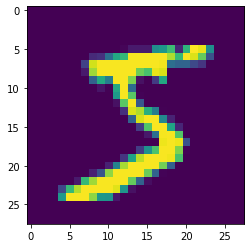

In [4]:
# calling plt.imshow() to view any one example 
plt.imshow(X_train[0])

In [5]:
# Scaling the dataset

X_train = X_train/255
X_test = X_test/255

# Basic Autoencoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
784/2
# Basically,I aim to structure a stacked up autoencoder with several hidden layers. '784' just signifies the dimension of image
# i.e '28 x 28' frame image

392.0

In [8]:
encoder = Sequential()

# It's probably too much to ask to just go from seven hundred eighty four down to something like twenty-five dimensions or so..
# Ḥence, I took it layer by layer to slowly smoothen the dimensionality reduction. I'm going from like 784 dimensions to 25 
# i.e. I've tried to bring down the dimensions to just 3% of the original dimension. 

encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

# The last layer is the central hidden layer! So in the decoding part I've started from the penultimate layer - the one with 50
# neurons

**Coming up next is the decoder**

In [10]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))

# The important thing to note here is the activation change - from 'relu' to 'sigmoid'. 
# This is is because we essentially need to perform a binary cross entropy loss at the end of our auto encoder.
# Basically, I'm trying to check- does the final output image after going through the entire auto encoder match the true image that we suspect it to be.

decoder.add(Reshape([28, 28]))

In [11]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

# Optimizer and learning rate can be played around with - Alternatively, Adam or RMSprop can be used to optimize the autoencoder

In [13]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])
# Note the gradual increase in accuracy values

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1383 - accuracy: 0.8059 - val_loss: 0.1352 - val_accuracy: 0.8049
Epoch 2/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1354 - accuracy: 0.8064 - val_loss: 0.1353 - val_accuracy: 0.8073
Epoch 3/5
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1323 - accuracy: 0.8072 - val_loss: 0.1292 - val_accuracy: 0.8071
Epoch 4/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.1284 - accuracy: 0.8080 - val_loss: 0.1263 - val_accuracy: 0.8087
Epoch 5/5
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1251 - accuracy: 0.8086 - val_loss: 0.1204 - val_accuracy: 0.8086


In [30]:
passed_images = autoencoder.predict(X_test[:10])
# Passing 10 images that autoencoder wasn't trained on i.e test data.

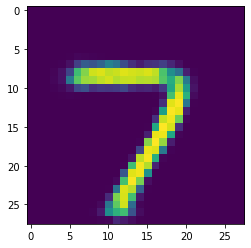

In [31]:
# Attempted reconstruction ;-)
plt.imshow(passed_images[0])

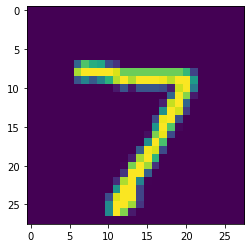

In [32]:
# Original Image
plt.imshow(X_test[0])

**Next- Denoise the image with Autoencoders**

# AutoEncoders for Denoising Images

In [33]:
from tensorflow.keras.layers import GaussianNoise

In [34]:
sample = GaussianNoise(0.2)

In [35]:
noisey = sample(X_test[0:2],training=True)
# Warning can be ignored as of now.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



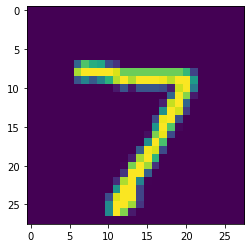

In [36]:
# Original image before adding noise
plt.imshow(X_test[0])

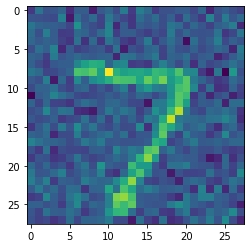

In [37]:
# Image after adding noise
plt.imshow(noisey[0])

In [38]:
import tensorflow as tf
import numpy as np

In [39]:
# I'm actually going to use the same autoencoder I created above

tf.random.set_seed(101)
np.random.seed(101)
# Can be any number apart from 101.


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Adding noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [40]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [41]:
noise_remover = Sequential([encoder, decoder])

In [42]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [43]:
noise_remover.fit(X_train, X_train, epochs=8)
# Note that we can pass and validation data in order to compare it to see how it's actually removing noise, 
# but I've refrained from using it!

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 17s 285us/sample - loss: 0.1701 - accuracy: 0.8012
Epoch 2/8
60000/60000 [==============================] - 16s 270us/sample - loss: 0.1291 - accuracy: 0.8081
Epoch 3/8
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1198 - accuracy: 0.8098
Epoch 4/8
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1153 - accuracy: 0.8105
Epoch 5/8
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1126 - accuracy: 0.8109
Epoch 6/8
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1104 - accuracy: 0.8113
Epoch 7/8
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1085 - accuracy: 0.8116
Epoch 8/8
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1067 - accuracy: 0.8118


In [47]:
ten_noisey_images = sample(X_test[0:10],training=True)
# Creating 10 noisey images and passing those through autoencoder
denoised = noise_remover(ten_noisey_images[0:10])

The Original


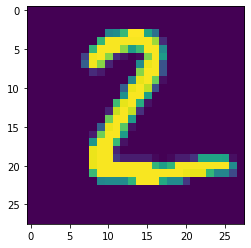

The Noisey Version !


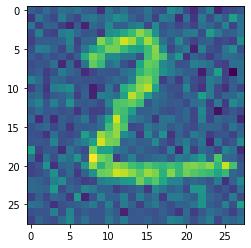

After going through denoiser !


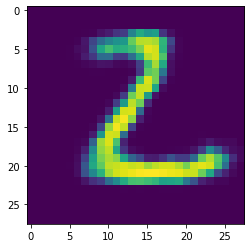

In [49]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version !")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser !")
plt.imshow(denoised[n])
plt.show()

# Do play around with 'n' to see more!